In [1]:
import numpy as np

In [66]:
component_a = np.array([55.8, 20.4, 17.1, 18.5, 19.2]) 
component_b = np.array([7.8, 52.1, 12.3, 13.9, 18.5]) 
component_c = np.array([16.4, 11.5, 46.1, 11.5, 21.3]) 
component_d = np.array([11.7, 9.2, 14.1, 47.0, 10.4])
component_e = np.array([8.3, 6.8, 10.4, 9.1, 30.6 ])



a = [component_a, component_b, component_c, component_d, component_e]
b = [40*25, 40*18, 40*23, 40*18, 40*16]

sol = np.linalg.solve(a, b)

if np.linalg.det(a) == 0:
    print(f"Coefficient Matrix is singular")
else:
    print(f"Coefficient Matrix is not singular")

if np.linalg.cond(a) > 1000:
    print(f'Matrix is poorly conditioned')

else:
    print(f"Matrix is well conditioned")
    
if np.linalg.matrix_rank(a) == len(b):
    print("Unique solution")
    
print(f'Tank 1 uses {sol[0]} liters ')
print(f'Tank 2 uses {sol[1]} liters ')
print(f'Tank 3 uses {sol[2]} liters ')
print(f'Tank 4 uses {sol[3]} liters ')
print(f'Tank 5 uses {sol[4]} liters ')

Coefficient Matrix is not singular
Matrix is well conditioned
Unique solution
Tank 1 uses 6.837617135640422 liters 
Tank 2 uses 4.1795263514213685 liters 
Tank 3 uses 8.639755446763804 liters 
Tank 4 uses 7.326760497058661 liters 
Tank 5 uses 13.016340569115744 liters 


Problem 4

In [62]:
import numpy as np

A = np.array([[2, 7, -1, 3, 1],
              [2, 3, 4, 1, 7],
              [6, 2, -3, 2, -1],
              [2, 1, 2, -1, 2],
              [3, 4, 1, -2, 1]], float)

b = np.array([5, 7, 2, 3, 4], float)

n = len(b)

x = np.zeros(n, float)

for k in range(0, n - 1):
    if A[k, k] == 0:
        for j in range(n):
            A[k, j], A[k + 1, j] = A[k + 1, j], A[k, j]
        b[k], b[k + 1] = b[k + 1], b[k]
    for i in range(k + 1, n):
        lam = A[i, k] / A[k, k]
        b[i] = b[i] - lam * b[k]

        for j in range(k, n):
            A[i, j] = A[i, j] - lam * A[k, j]

x[n - 1] = b[n - 1] / A[n - 1, n - 1]
for i in range(n - 2, -1, -1):
    terms = 0
    for j in range(i + 1, n):
        terms += A[i, j] * x[j]
    x[i] = (b[i] - terms) / A[i, i]
print(x)
#pivot was missing
#terms



[0.44444444 0.55555556 0.66666667 0.22222222 0.22222222]


R=squared = 0.9998263984888064


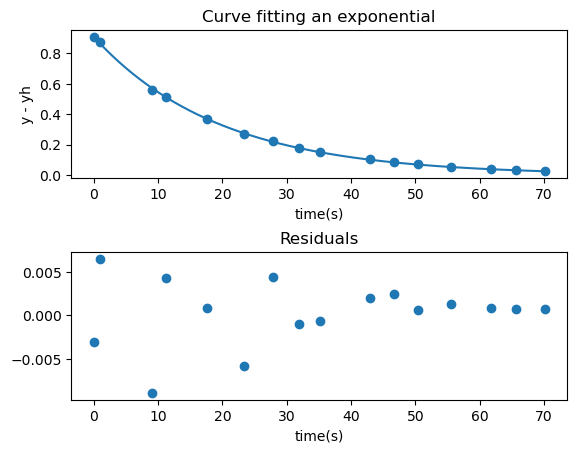

In [158]:
import pandas as pd
import scipy as sci
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

df = pd.read_csv("data.csv", delimiter=",")
t = df["Time"].to_numpy()
y = df["Concentration"].to_numpy()

dy_dt = np.gradient(y, t)

def second_model(t, a, k):
    return a*np.exp(-t*k)

popt, pcov = curve_fit(second_model, t, y)

a = popt[0]
b = popt[1]
smooth_time = np.linspace(0, 70, 1000)
fig1, (ax1, ax2) = plt.subplots(2, 1)
newy = second_model(smooth_time, a, b)
predictedy = second_model(t, a, b)
ax1.plot(smooth_time, newy)
ax1.scatter(t, y)
ax1.set_title("Curve fitting an exponential")
residual = y - predictedy
ax2.scatter(t, residual)

ax2.set_title("Residuals")
fig1.subplots_adjust(hspace=.5)
ax2.set_xlabel("time(s)")
ax1.set_xlabel("time(s)")
ax1.set_ylabel("Concentration (mol/L)")
ax1.set_ylabel('y - yh')

meant = t.mean()
meany = y.mean()

SSR = sum((predictedy - meany)**2)
SSE = sum((y - predictedy)**2)
SST = sum((y - meany)**2)
R = 1 - SSE/SST
print(f'R=squared = {R}')
